In [2]:
'''
original repository: https://github.com/jcjohnson/fast-neural-style
papers:
eccv16: https://cs.stanford.edu/people/jcjohns/papers/eccv16/JohnsonECCV16.pdf
instance_norm https://arxiv.org/pdf/1607.08022.pdf
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os,glob

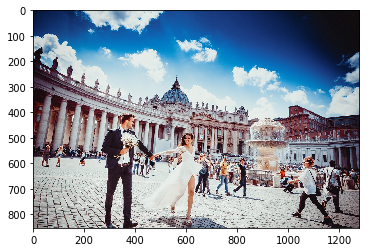

In [3]:
img_path = 'imgs/03.jpg'
filename = os.path.splitext(os.path.basename(img_path))[0]

img = cv2.imread(img_path)
img_640 = cv2.resize(img, (640, int(img.shape[0] / img.shape[1] * 640)))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
MEAN_VALUE = [103.939, 116.779, 123.680]

def inference(input_img, model_path='models/eccv16/la_muse.t7'):
    net = cv2.dnn.readNetFromTorch(model_path)

    h, w, _ = input_img.shape

    blob = cv2.dnn.blobFromImage(input_img, scalefactor=1.0, size=(w, h), mean=MEAN_VALUE, swapRB=False, crop=False)
    net.setInput(blob)
    output = net.forward()
    
    output = output.squeeze().transpose((1, 2, 0))
    
    output += MEAN_VALUE
    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)
    
    return output

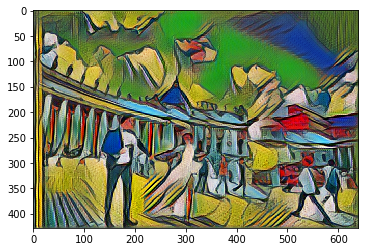

In [5]:
output_640 = inference(img_640)

cv2.imwrite('imgs/%s_600_result.jpg' % (filename), output_640)
plt.imshow(cv2.cvtColor(output_640, cv2.COLOR_BGR2RGB))

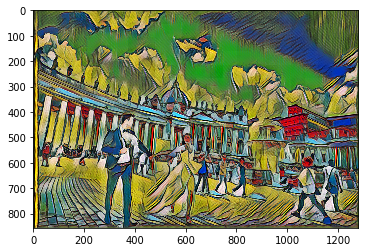

In [6]:
output_ori = inference(img)

cv2.imwrite('imgs/%s_ori_result.jpg' % (filename), output_ori)
plt.imshow(cv2.cvtColor(output_ori, cv2.COLOR_BGR2RGB))

In [7]:
models = sorted(glob.glob('models/*/*.t7'))

print(len(models))
print(models)

11
['models/instance_norm/mosaic.t7', 'models/instance_norm/candy.t7', 'models/instance_norm/the_scream.t7', 'models/instance_norm/starry_night.t7', 'models/instance_norm/feathers.t7', 'models/instance_norm/la_muse.t7', 'models/instance_norm/udnie.t7', 'models/eccv16/starry_night.t7', 'models/eccv16/la_muse.t7', 'models/eccv16/composition_vii.t7', 'models/eccv16/the_wave.t7']


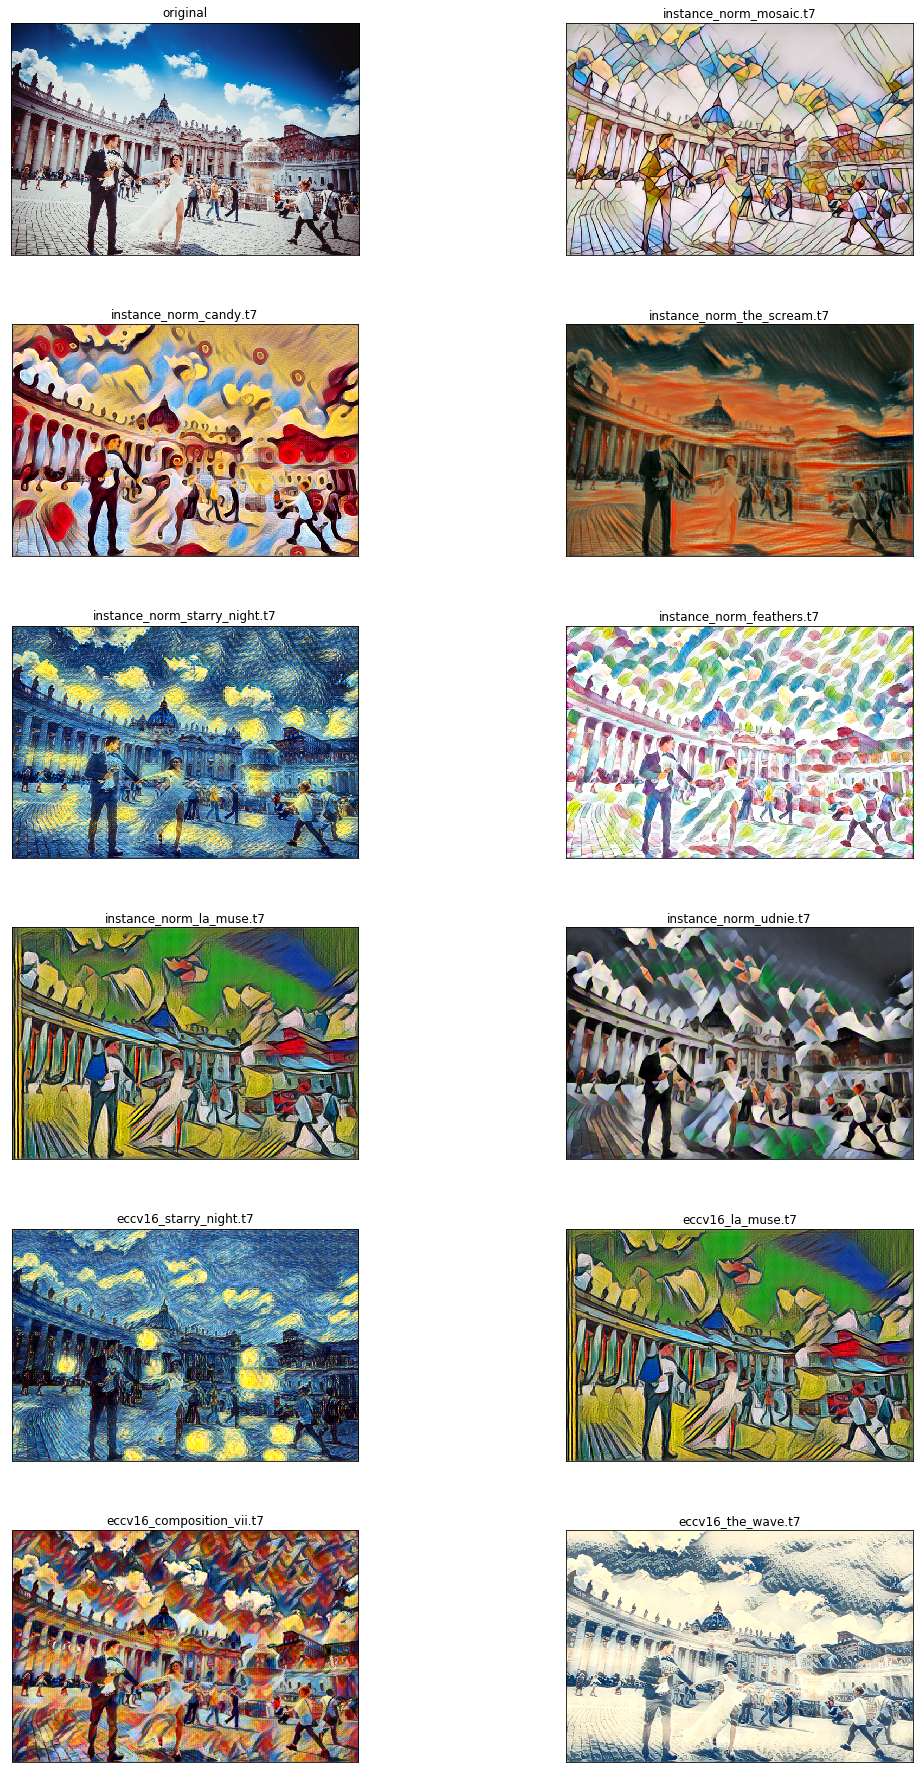

In [8]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 32),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)

axs[0, 0].set_title('original')
axs[0, 0].imshow(cv2.cvtColor(img_640, cv2.COLOR_BGR2RGB))

for ax, model_path in zip(axs.flat[1:], models):
    output = inference(img_640, model_path=model_path)
    
    ax.set_title('_'.join(model_path.split('/')[1:3]))
    ax.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))